# Removal of stimulation artifact

In [2]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kurtosis

## Loadning of data

### 2D data

In [13]:
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D)}")
print(f"Data shape: {np.shape(average_per_eye_2D)}")



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


### 3D data

In [14]:
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]


# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


## Template subtraction

## ICA

In [36]:
data = all_data_3D[4]
data = data.T  # Shape becomes (300300, 32)

# Initialize ICA
ica = FastICA(n_components=32, random_state=4)

# Fit the model and transform the data
ica_components = ica.fit_transform(data)

# Get the mixing matrix
mixing_matrix = ica.mixing_

# The independent components are now in ica_components
print(ica_components.shape)  


(300300, 32)


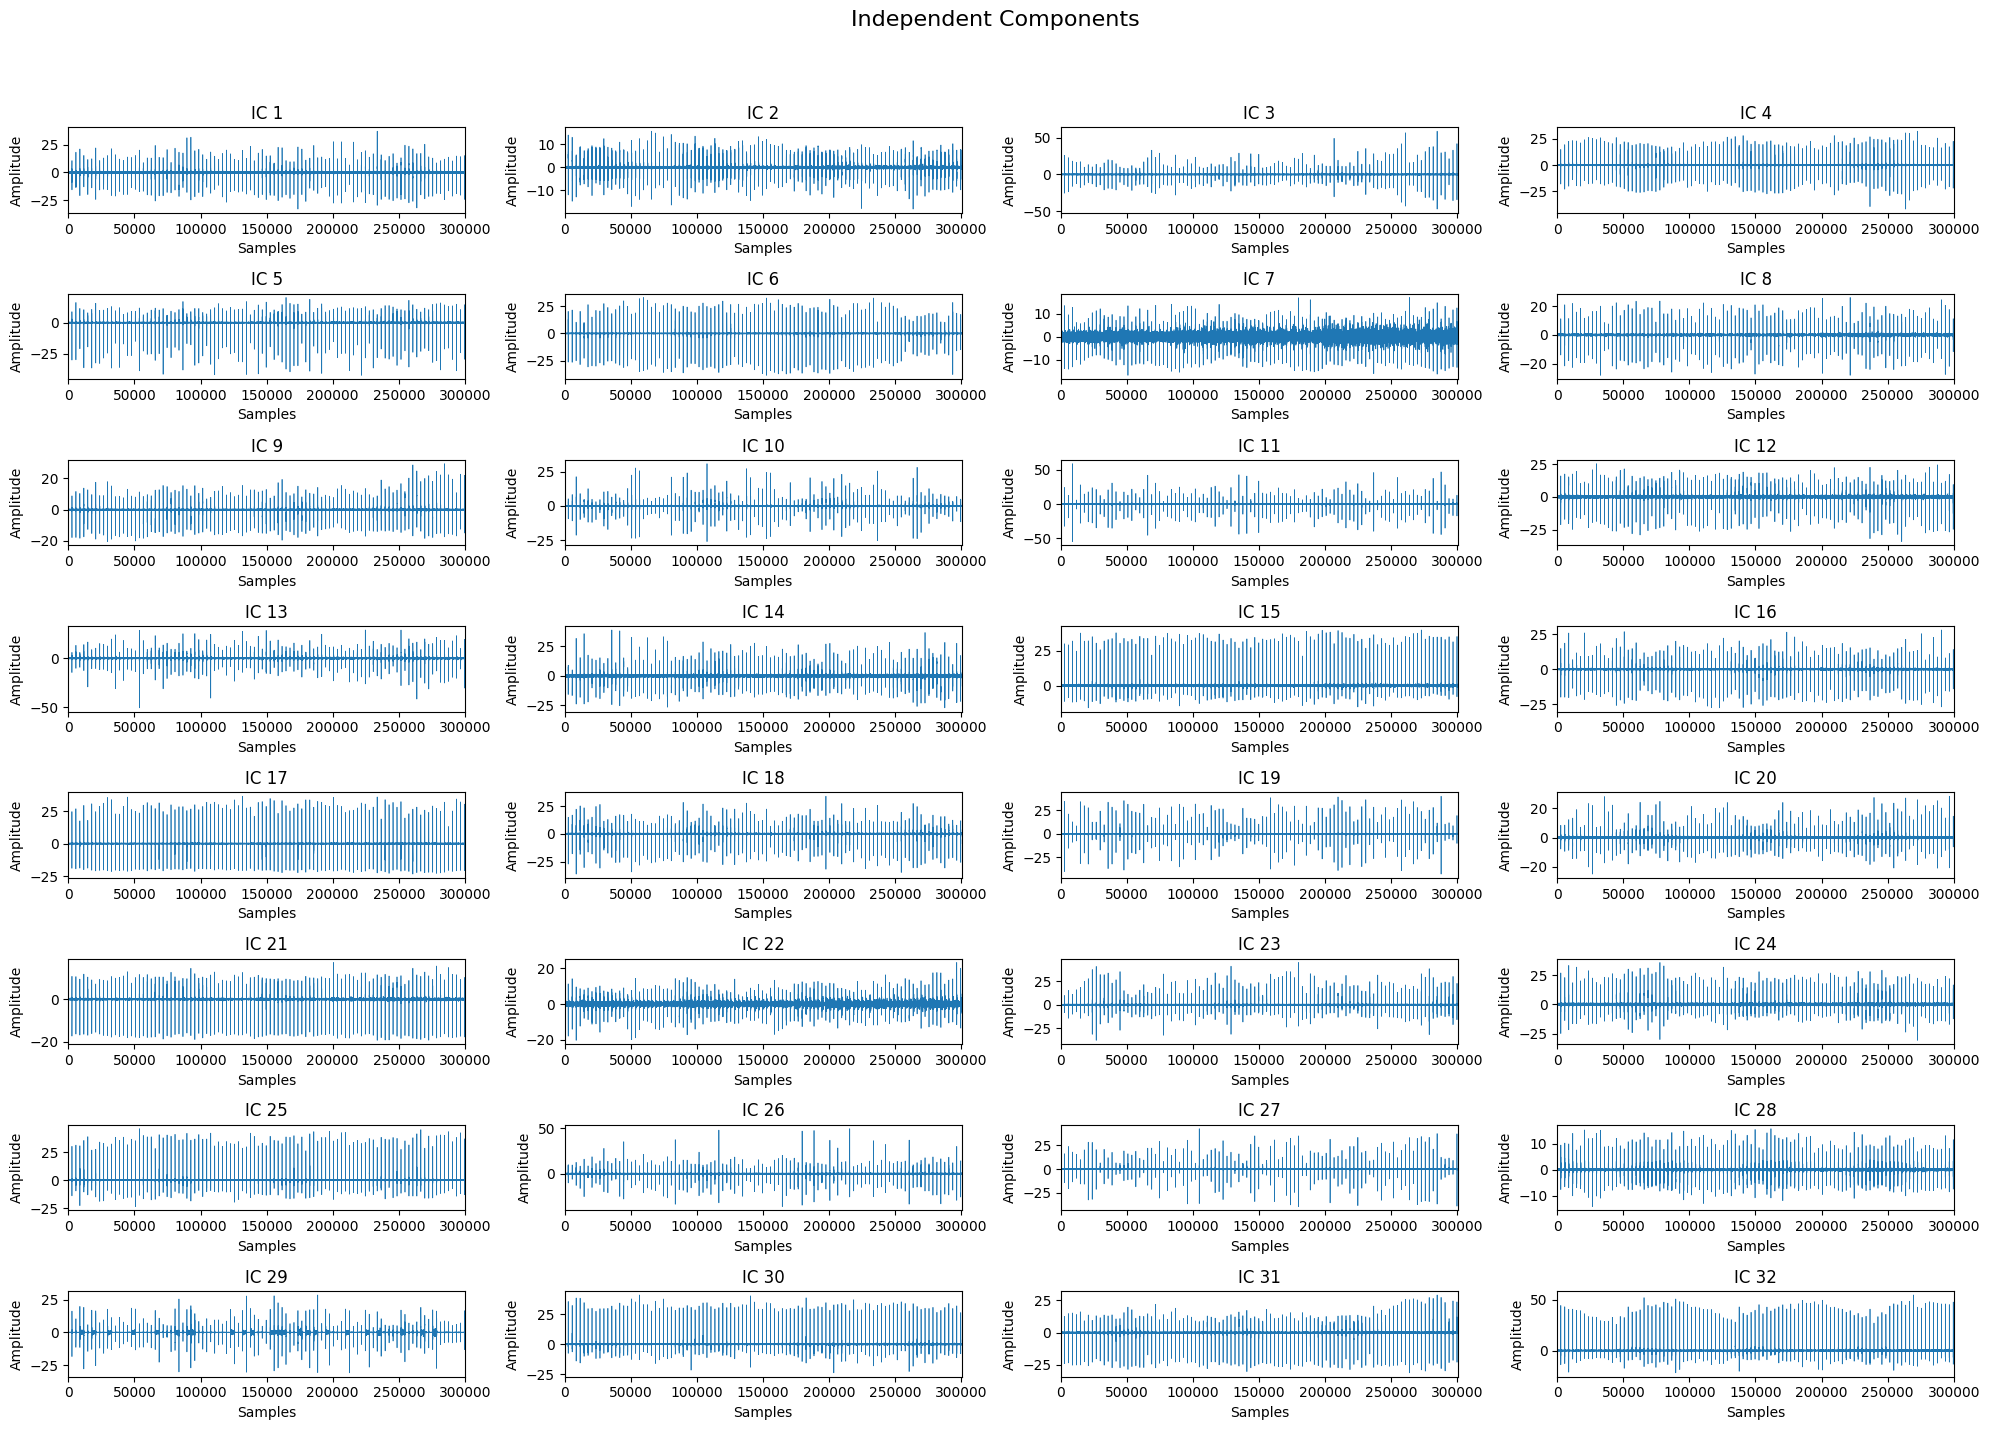

In [38]:
def plot_ics(ica_components, n_rows=8, n_cols=4):
    # Create a figure for plotting
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    fig.suptitle('Independent Components', fontsize=16)

    # Loop through each component and plot
    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]  # Get the right axis
        ax.plot(ica_components[:, i], lw=0.5)
        ax.set_title(f'IC {i+1}')
        ax.set_xlim([0, ica_components.shape[0]])
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage with 32 ICs
plot_ics(ica_components, n_rows=8, n_cols=4)


In [72]:
# Extract the first two independent components for 2D plotting
ic1 = ica_components[:, 0]
ic2 = ica_components[:, 1]
ic3 = ica_components[:, 2]

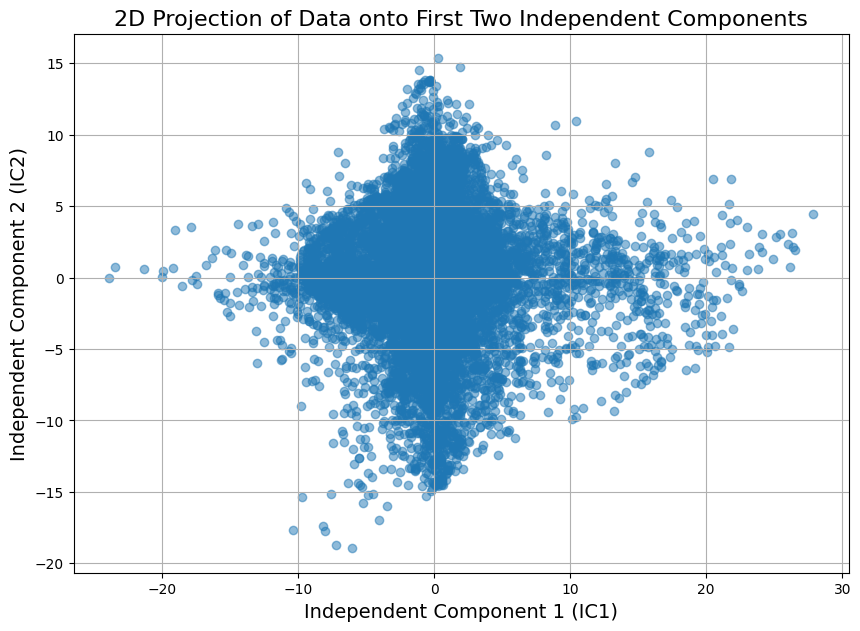

In [74]:
def plot_ica_2d(ic1, ic2):
    plt.figure(figsize=(10, 7))
    plt.scatter(ic1, ic2, alpha=0.5)
    plt.title('2D Projection of Data onto First Two Independent Components', fontsize=16)
    plt.xlabel('Independent Component 1 (IC1)', fontsize=14)
    plt.ylabel('Independent Component 2 (IC2)', fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the 2D projection
plot_ica_2d(ic1, ic2)

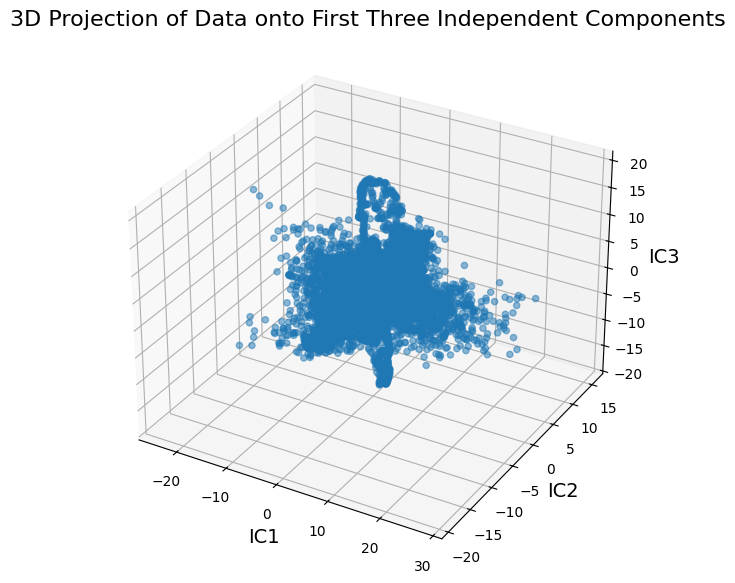

In [73]:
def plot_ica_3d(ic1, ic2, ic3):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ic1, ic2, ic3, alpha=0.5)
    ax.set_title('3D Projection of Data onto First Three Independent Components', fontsize=16)
    ax.set_xlabel('IC1', fontsize=14)
    ax.set_ylabel('IC2', fontsize=14)
    ax.set_zlabel('IC3', fontsize=14)
    plt.show()

# Plot the 3D projection
plot_ica_3d(ic1, ic2, ic3)

/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Th

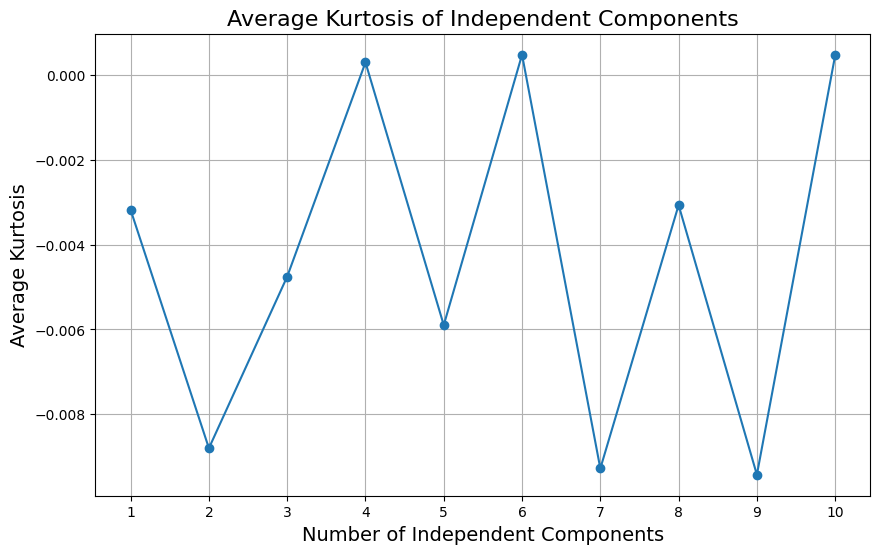

In [79]:
max_components = 10  # Max number of independent components to test
kurtosis_values = []

for n_components in range(1, max_components + 1):
    ica = FastICA(n_components=n_components, random_state=42)
    ica_components = ica.fit_transform(data)
    # Compute kurtosis for each component
    kurt_values = kurtosis(ica_components, axis=0, fisher=True)  # Fisher's definition (subtracts 3)
    avg_kurtosis = np.mean(kurt_values)  # Average kurtosis across components
    kurtosis_values.append(avg_kurtosis)

# Plot cumulative kurtosis
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), kurtosis_values, marker='o')
plt.title('Average Kurtosis of Independent Components', fontsize=16)
plt.xlabel('Number of Independent Components', fontsize=14)
plt.ylabel('Average Kurtosis', fontsize=14)
plt.grid(True)
plt.xticks(range(1, max_components + 1))
plt.show()


## PCA

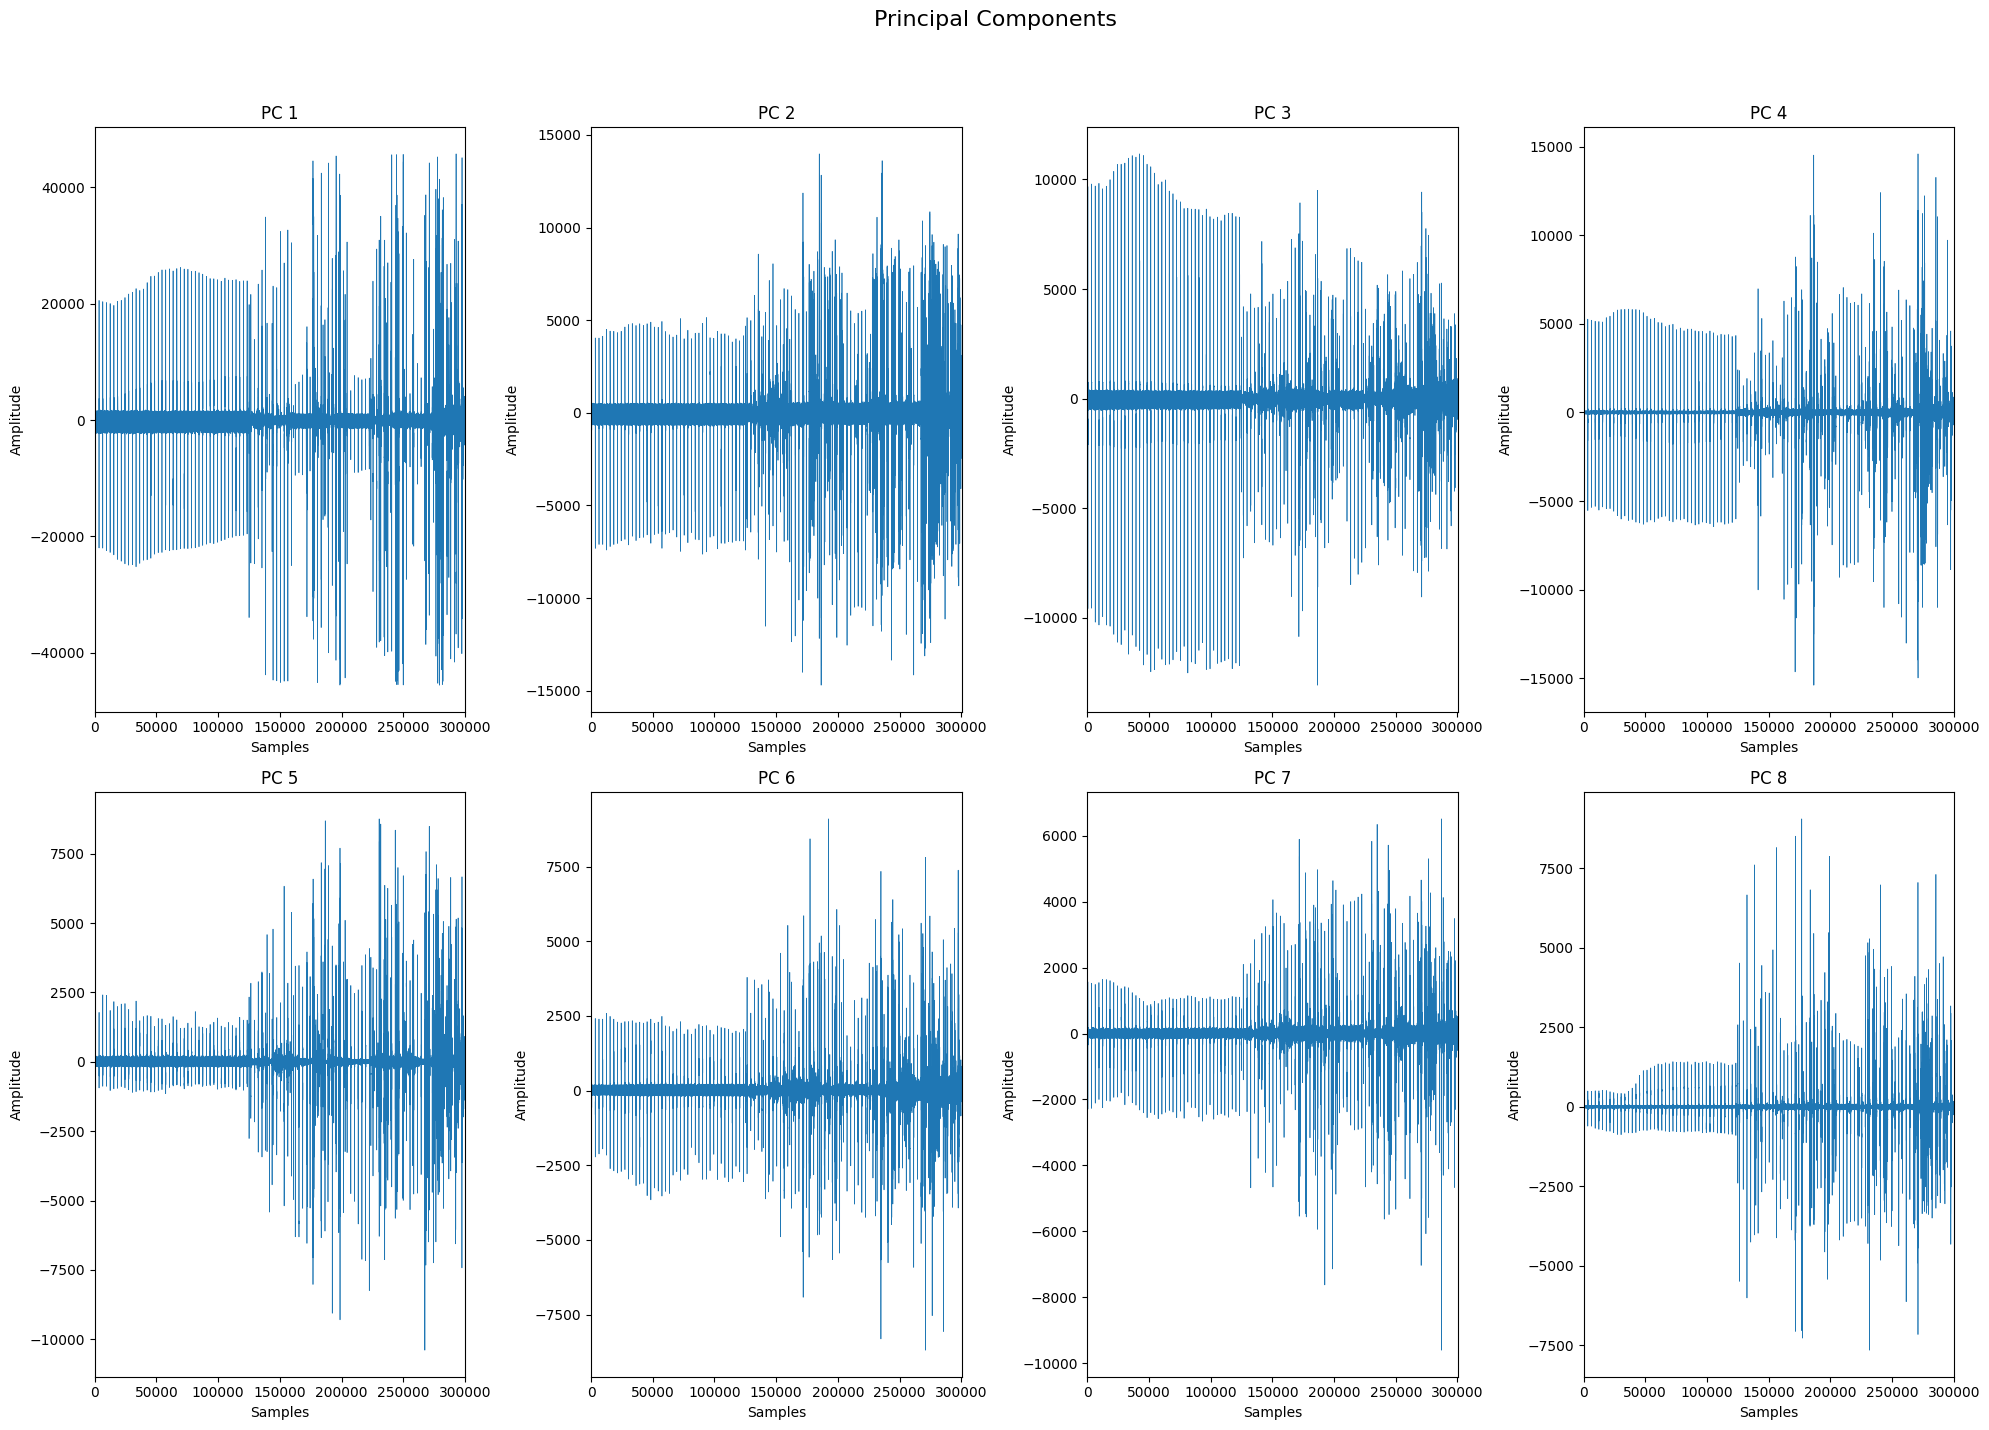

In [69]:
data = all_data_3D[1]
data = data.T  # Shape becomes (300300, 32)

# Perform PCA
pca = PCA(n_components=8)
pca_components = pca.fit_transform(data)

# Function to plot the principal components
def plot_pcs(pca_components, n_rows=8, n_cols=4):
    # Create a figure for plotting
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    fig.suptitle('Principal Components', fontsize=16)

    # Loop through each component and plot
    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]  # Get the right axis
        ax.plot(pca_components[:, i], lw=0.5)
        ax.set_title(f'PC {i+1}')
        ax.set_xlim([0, pca_components.shape[0]])
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage with 32 PCs
plot_pcs(pca_components, n_rows=2, n_cols=4)


In [66]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")


Explained variance by each component: [0.77050686 0.08920451 0.03773019 0.02887695 0.01607248 0.01238313
 0.00811135 0.00754891]


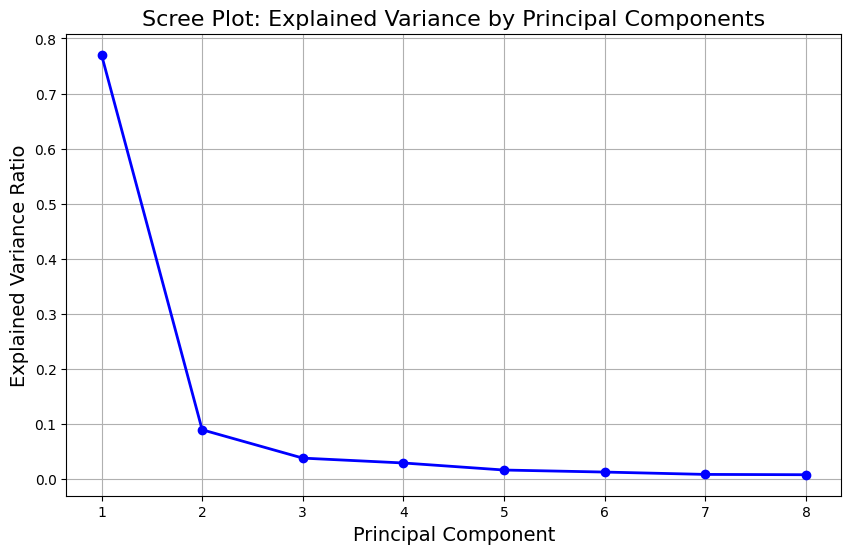

In [67]:
def plot_scree(explained_variance):
    # Number of components
    n_components = len(explained_variance)
    
    # Create a scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, n_components + 1), explained_variance, 'o-', linewidth=2, color='b')
    plt.title('Scree Plot: Explained Variance by Principal Components', fontsize=16)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Explained Variance Ratio', fontsize=14)
    plt.xticks(np.arange(1, n_components + 1))
    plt.grid(True)
    plt.show()

# Plot the scree plot
plot_scree(explained_variance)

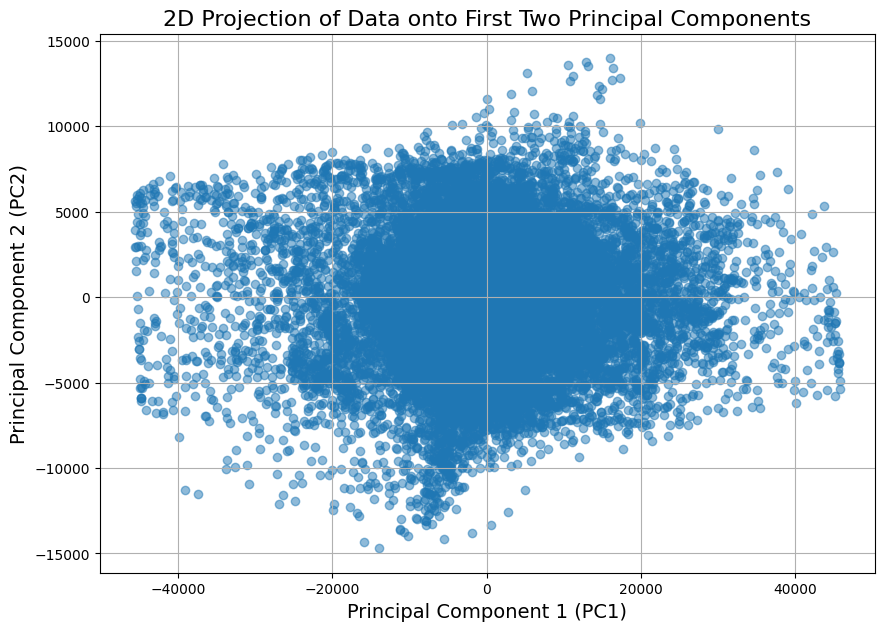

In [68]:
pc1 = pca_components[:, 0]
pc2 = pca_components[:, 1]

def plot_pca_2d(pc1, pc2):
    plt.figure(figsize=(10, 7))
    plt.scatter(pc1, pc2, alpha=0.5)
    plt.title('2D Projection of Data onto First Two Principal Components', fontsize=16)
    plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
    plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the 2D projection
plot_pca_2d(pc1, pc2)


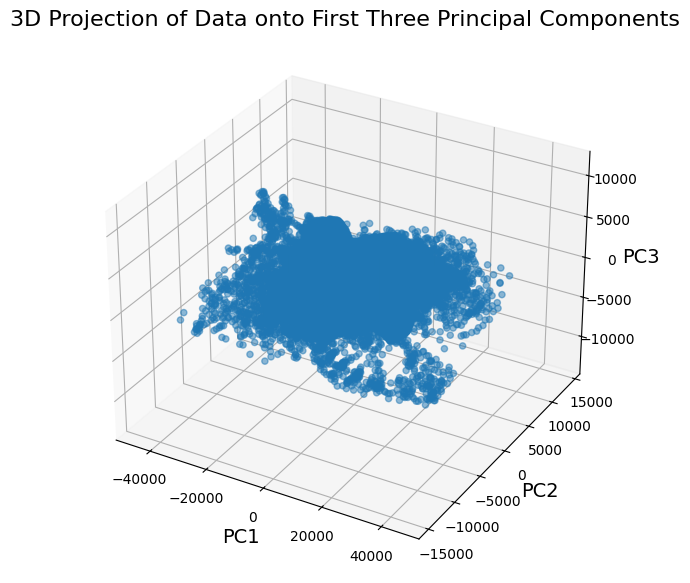

In [60]:

# Get the first three principal components for 3D plotting
pc1 = pca_components[:, 0]
pc2 = pca_components[:, 1]
pc3 = pca_components[:, 2]

def plot_pca_3d(pc1, pc2, pc3):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc1, pc2, pc3, alpha=0.5)
    ax.set_title('3D Projection of Data onto First Three Principal Components', fontsize=16)
    ax.set_xlabel('PC1', fontsize=14)
    ax.set_ylabel('PC2', fontsize=14)
    ax.set_zlabel('PC3', fontsize=14)
    plt.show()

# Plot the 3D projection
plot_pca_3d(pc1, pc2, pc3)
